In [1]:
import mpmath

import dg1
import dg1_high_prec

# Set mpmath precision.
mpmath.mp.prec = 100  # 100 bits vs. default (53)

# Replace math-provider with our custom high-precision one.
dg1.MathProvider = dg1_high_prec.HighPrecProvider

total_time = mpmath.mpf('1.0')
p_order = 3
num_intervals = 16
dt = mpmath.mpf('1') / 108
solver = dg1.DG1Solver(num_intervals=num_intervals,
                       p_order=p_order,
                       total_time=total_time,
                       dt=dt,
                       points_on_ref_int=dg1_high_prec.gauss_lobatto_points)

In [2]:
import time

# Save initial solution and then run the solver
start = time.time()
init_soln = solver.solution.copy()
while solver.current_step != solver.num_steps:
    solver.update()

duration = time.time() - start
print('Solver took %gs for %d iterations' % (duration, solver.num_steps))

Solver took 4.58779s for 108 iterations


In [3]:
max_err = abs(init_soln - solver.solution).max()
print('Maximum global error: %s' % (max_err,))

Maximum global error: 0.0012731418903356140761407646489


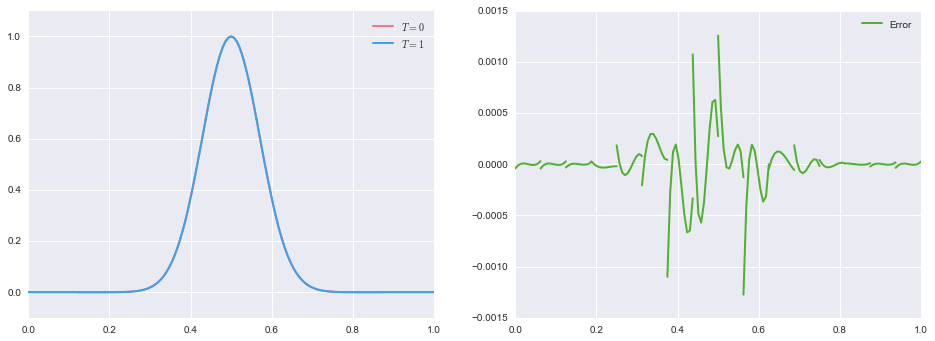

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn

import dg1
import plotting


seaborn.set_palette('husl')


rows, cols = 1, 2
fig, (ax1, ax2) = plt.subplots(rows, cols)

x_vals = solver.node_points[:, 0].astype(float)
interp_func = plotting.PolynomialInterpolate(x_vals)
# Fake the "solution" for the initial data.
final_val = solver.solution
solver.solution = init_soln
husl_red = seaborn.husl_palette(6)[0]
lines = plotting.plot_solution(husl_red, num_intervals,
                               interp_func, solver, ax1)
lines[0].set_label('$T = 0$')
# Put back the correct solution
solver.solution = final_val

husl_blue = seaborn.husl_palette(6)[4]
lines = plotting.plot_solution(husl_blue, num_intervals,
                               interp_func, solver, ax1)
lines[0].set_label('$T = 1$')
# Configure axis 1.
ax1.set_xlim(0, 1)
ax1.set_ylim(-0.1, 1.1)
ax1.grid(b=True)
ax1.legend(loc='upper right')

# Fake the error for plotting as well.
solver.solution = init_soln - final_val
husl_green = seaborn.husl_palette(6)[2]
lines = plotting.plot_solution(husl_green, num_intervals,
                               interp_func, solver, ax2)
lines[0].set_label('Error')
# Put back the correct solution
solver.solution = final_val

# Configure axis 2.
ax2.set_xlim(0, 1)
ax2.grid(b=True)
ax2.legend(loc='upper right')

# Double the width of the plot and display.
W, H = fig.get_size_inches()
fig.set_size_inches(2 * W, H)
plt.show()